### Point 2

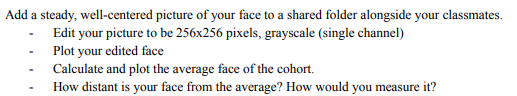

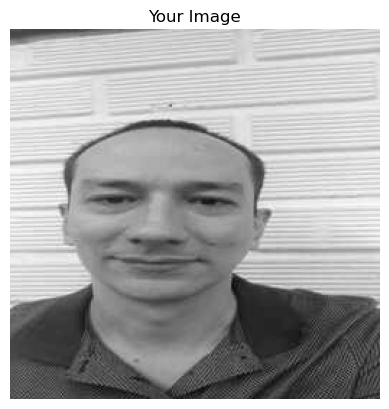

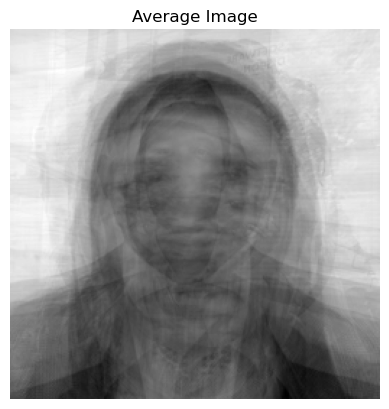

Mean absolute pixel difference between your image and the average image is: 117.21929931640625


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder with images
folder_path = r'C:\Users\57317\Documents\UdeA\08 Machine Learning II\Ejercicios\Lab I\Fotos'

# Get the list of files in the folder
files = os.listdir(folder_path)

# Initialize a list to store the images
images = []

# Read and preprocess each image
for file in files:
    # Combine the folder path with the file name
    complete_path = os.path.join(folder_path, file)
    
    # Read the image and convert it to grayscale
    image = cv2.imread(complete_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to 256x256
    image = cv2.resize(image, (256, 256))
    
    # Add the image to the list
    images.append(image)

# Convert the list of images into a numpy array
images = np.array(images)

# Show your image
your_image = images[4]
plt.imshow(your_image, cmap='gray')
plt.title('Your Image')
plt.axis('off')
plt.show()

# Calculate and show the average image
average_image = np.mean(images, axis=0).astype('uint8')
plt.imshow(average_image, cmap='gray')
plt.title('Average Image')
plt.axis('off')
plt.show()

# Calculate the distance between your image and the average image
difference = np.abs(your_image - average_image)

# Calculate the average distance (you could use different metrics)
average_distance = np.mean(difference)

print(f"Mean absolute pixel difference between your image and the average image is: {average_distance}")

### Point 4

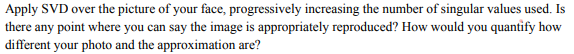

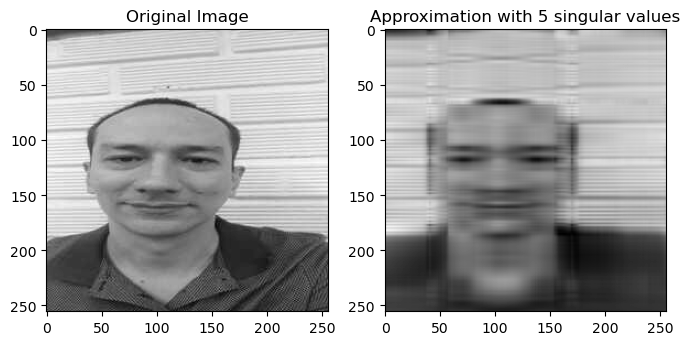

In [4]:
U, S, Vt = np.linalg.svd(your_image, full_matrices=False)

n_components = 5  # Number of singular values to use
approximation = np.dot(U[:, :n_components], np.dot(np.diag(S[:n_components]), Vt[:n_components, :]))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(your_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(approximation, cmap='gray')
plt.title('Approximation with {} singular values'.format(n_components))
plt.show()

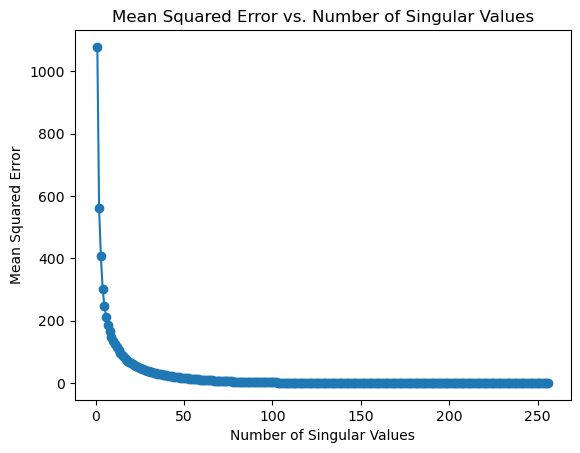

In [5]:
from sklearn.metrics import mean_squared_error

# Perform SVD on your image
U, S, Vt = np.linalg.svd(your_image, full_matrices=False)

# Initialize a list to store reconstructed images
reconstructed_images = []

# Iterate through different numbers of singular values
for k in range(1, len(S)+1):
    # Reconstruct the image using k singular values
    reconstructed_image = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    reconstructed_images.append(reconstructed_image)

# Calculate MSE between original and reconstructed images
mse_values = [mean_squared_error(your_image, img) for img in reconstructed_images]

# Plot the MSE values
plt.plot(range(1, len(S)+1), mse_values, marker='o')
plt.xlabel('Number of Singular Values')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Singular Values')
plt.show()